In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as mp

In [2]:
#Read in the file with pandas
def readInWL(filenameIn):
   dataIn = pd.read_csv(filenameIn, index_col=0, parse_dates=False,
                        usecols=['DATE_TIME','A1_WL_VALUE_MSL','A1_WL_SIGMA','B1_WL_VALUE_MSL','VER_WL_VALUE_MSL','PRED_WL_VALUE_MSL']
                        )
   dataIn.columns = ['primary','sigma','backup','verified','prediction']
   dataIn.index.name ='time'
   dataIn = dataIn.apply(pd.to_numeric, errors='coerce')
   dataIn.head()
   return dataIn

In [14]:
def initial_data_prep(dataIn):
    """Does some initial data preparation
    such as replacing -999999 with Nans
    and subsetting the data range."""
    
    # Replace -99999 with NaNs
    dataIn.mask( (dataIn <= -1000), inplace=True)
    
    # drop any lines with NaNs
    dataUnNaN = dataIn.dropna()
    
    # decide what time window we want to extract and clean
    # only data after 2007 are any good
    timeStart='2007-01-01 00:00:00'
    timeEnd='2017-12-31 23:54:00'   
    dataSub = dataUnNaN[timeStart:timeEnd]
    
    # Change the index
    data_indexed = dataSub.reset_index()
    
    return data_indexed

In [9]:
def remove_extra_datapoints(data_indexed):
    """Removes extra datapoints that are occuring
    between the expected datapoints that should only
    occur every 6 minutes."""

    # Pull out the time column
    time_asdatetime = data_indexed.time
    # convert to datetime
    time_asdt = pd.to_datetime(time_asdatetime)
    # pull out the minutes from the datetime
    minutes = time_asdt.dt.minute
    
    fig = mp.figure()
    
    # lets see what our time differences look like
    # before we clean the data
    difftime = np.diff(time_asdt)
    ax1 = mp.subplot(221)
    ax1.set_title("Original Time Differences")
    ax1.plot(difftime)
    
    # all minutes must be 0, 6, 12, ... 54
    goodminutes = range(0,60,6)
    
    # find and remove the bad minutes
    goodmask = np.isin(minutes, goodminutes)
    cleaned = data_indexed.loc[goodmask]
    
    # lets make sure we removed all the bad records
    # by plotting the time differences of the cleaned data
    cleantime = cleaned.time
    cleandt = pd.to_datetime(cleantime)
    cleandiff = np.diff(cleandt)
    ax2 = mp.subplot(222)
    ax2.set_title("Cleaned Time Differences")
    ax2.plot(cleandiff)
    
    return cleaned

In [10]:
# fileName to import
# we will focus on data from lewes and cape may (cm) from Jan 2012 - Dec 2015

filenameIn='gs://ohw_example/mlqcfortimeseries/8536110_cm_raw_ver_merged_wl.csv'
# filenameIn='gs://ohw_example/mlqcfortimeseries/8557380_lewes_raw_ver_merged_wl.csv'

In [11]:
# read in the file
dataIn = readInWL(filenameIn)

In [15]:
# initial data prep (remove nans and subset)
data_indexed = initial_data_prep(dataIn)

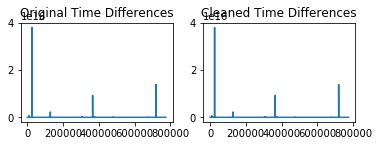

In [16]:
# remove any datapoints that are less than 6 minutes apart
cleaned = remove_extra_datapoints(data_indexed)